# Project 2 Notebook:

## Business Problem: 
 Our client buys, renovates, and then sells houses to make money. Recently, they bought a middle-class priced home and have come to us to ask what changes they could make to the house to sell it at the highest value.

## Data Understanding:

In [78]:
# Initial imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import zscore
from utils import evaluate_model

In [79]:
df = pd.read_csv('data/kc_house_data.csv')

In [80]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

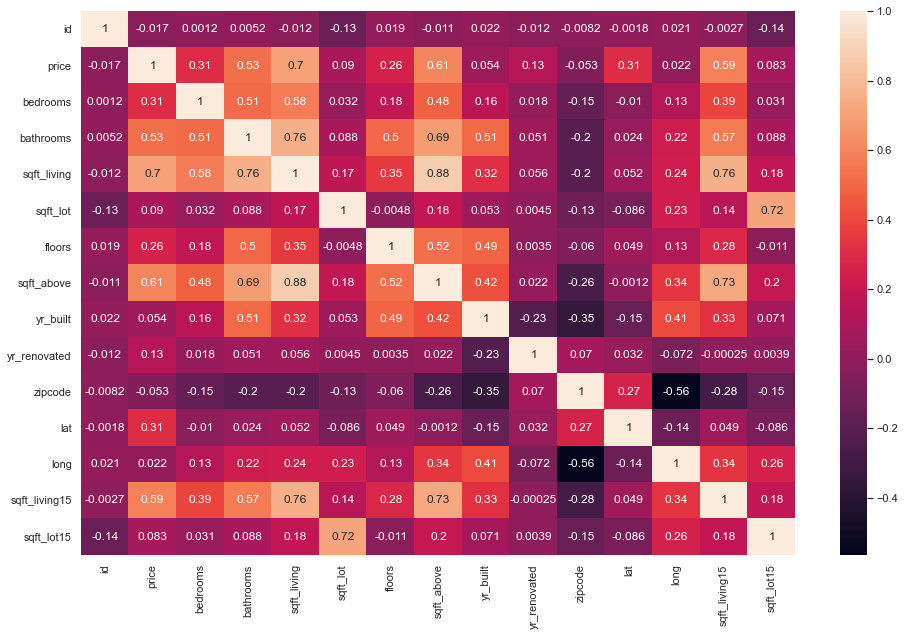

In [81]:
#Examining correlations
sns.set(rc = {'figure.figsize':(16,10)})
sns.heatmap(df.corr(), annot=True);

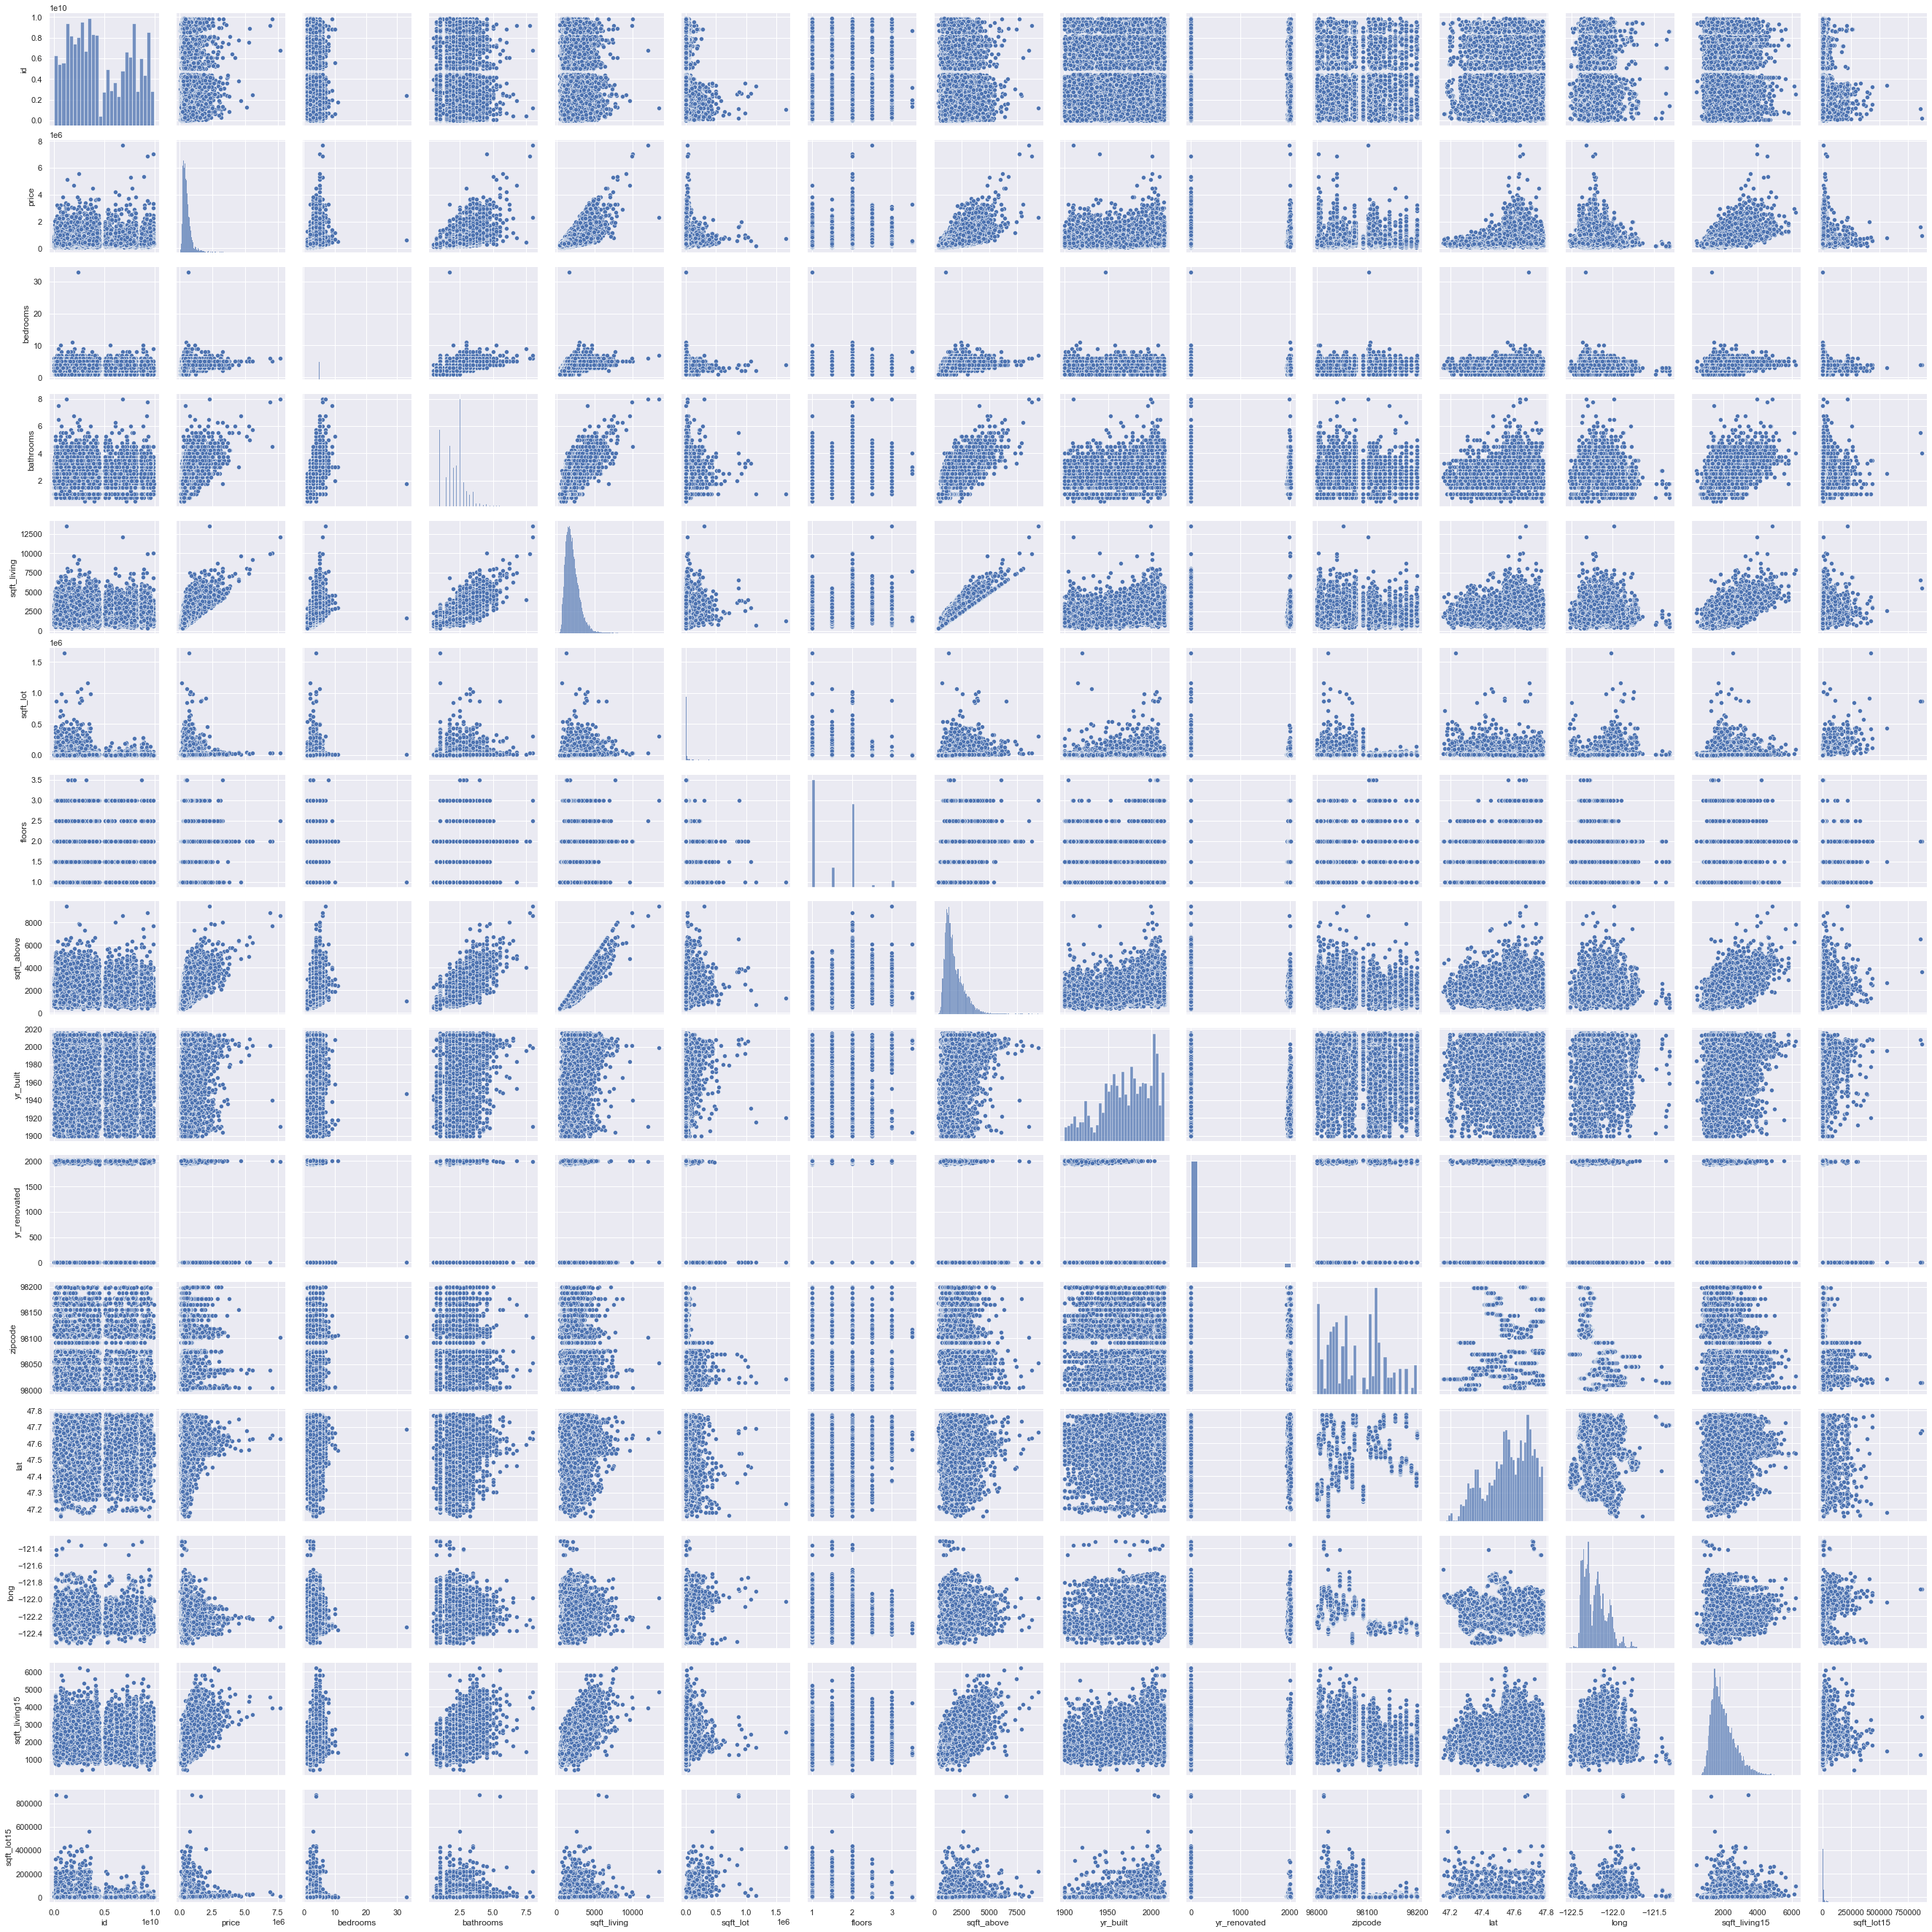

In [5]:
sns.pairplot(df);

## Data Manipulation

Our business question is dealing with a middle class home. To examine middle-class homes, we are going to filter the data by price.

In [6]:
#Filtering data to get middle class homes
zscore(df['price'])

array([-0.86671627, -0.00625157, -0.98077344, ..., -0.37618606,
       -0.38190525, -0.58606486])

In [7]:
df['price_z'] = zscore(df['price'])
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ... sqft_above sqft_basement  yr_built  \
0      5650     1.0        NaN  NONE  ...       1180           0.0      1955   
1      7242     2.0         NO  NONE  ...       2170         400.0      1951   
2     10000     1.0         NO  NONE  ...        770           0.0      1933   
3      5000     1.0         NO  NONE  ...       1050         910.0      1965   
4      8080     1.0         NO  NONE  ...       1680           0.0      1987   

  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price_z  
0          0.0    98178  47.5112 -122.257           1340        5650 -0.866716  
1       1991.0    98125  47.7210 -122.319           1690        7639 -0.006252  
2          NaN    98028  47.7379 -122.233           2720        8062 -0.980773  
3          0.0    98136  47.5208 -122.393           1360        5000  0.173409  
4          0.0    98074  47.6168 -122.045           1800        7503 -0.082471  

[5 rows x 22 columns]

In [8]:
#price_z_df == new df
price_z_df = df[df['price_z'] <= 1][df['price_z'] >=-1]
price_z_df.head()

<ipython-input-8-1fa99e15c774>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  price_z_df = df[df['price_z'] <= 1][df['price_z'] >=-1]


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ... sqft_above sqft_basement  yr_built  \
0      5650     1.0        NaN  NONE  ...       1180           0.0      1955   
1      7242     2.0         NO  NONE  ...       2170         400.0      1951   
2     10000     1.0         NO  NONE  ...        770           0.0      1933   
3      5000     1.0         NO  NONE  ...       1050         910.0      1965   
4      8080     1.0         NO  NONE  ...       1680           0.0      1987   

  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price_z  
0          0.0    98178  47.5112 -122.257           1340        5650 -0.866716  
1       1991.0    98125  47.7210 -122.319           1690        7639 -0.006252  
2          NaN    98028  47.7379 -122.233           2720        8062 -0.980773  
3          0.0    98136  47.5208 -122.393           1360        5000  0.173409  
4          0.0    98074  47.6168 -122.045           1800        7503 -0.082471  

[5 rows x 22 columns]

Our data has now been filtered to only include data with a price within one standard deviation of price. The next thing we are going to do is drop irrelevant columns. We are assuming the company already bought a house so we are going to drop variables that they do not have control over such as view and waterfront

In [9]:
#Droping irrelevant columns
df_new = price_z_df.drop(columns = 
                         ['id', 'date', 'lat', 'long', 'waterfront', 'view', 'yr_built', 'yr_renovated'])

Our next step is to turn columns with str values into int

In [10]:
#Turning sqft_basement into int instead of str
df_new['sqft_basement'] = df_new['sqft_living'] - df_new['sqft_above']

In [11]:
#Turning condition into int
df_new['condition'] = df_new['condition'].replace({'Average': 3, 'Very Good': 5, "Poor": 1, "Fair": 2, 'Good': 4}).astype(int)

In [12]:
df_new['condition'].unique

<bound method Series.unique of 0        3
1        3
2        3
3        5
4        3
        ..
21592    3
21593    3
21594    3
21595    3
21596    3
Name: condition, Length: 19205, dtype: int32>

In [13]:
#Turning grade into int
df_new['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '9 Better', '5 Fair',
       '10 Very Good', '4 Low', '11 Excellent', '12 Luxury', '3 Poor'],
      dtype=object)

In [14]:
df_new['grade'] = df_new['grade'].str[0:2].astype(int)

In [15]:
df_new['grade'].unique()

array([ 7,  6,  8,  9,  5, 10,  4, 11, 12,  3])

All of the columns we are dealing with have been converted to int. Now, it is time to model. Our first model will just look at the relationship between sqft_living and price

## Baseline Models

In [16]:
# Baseline model comparing price and sqft_living
X = df_new['sqft_living']
Y = df_new['price']

In [85]:
model1 = sm.OLS(Y, sm.add_constant(X))
results1 = model1.fit()
results1.params

const         -4.795045e+07
bbratio        1.304882e+04
grade          7.449608e+04
condition      3.616383e+04
sqft_living    8.110409e+01
zipcode        4.849608e+02
dtype: float64

In [19]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     8811.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:11:56   Log-Likelihood:            -2.5576e+05
No. Observations:               19205   AIC:                         5.115e+05
Df Residuals:                   19203   BIC:                         5.115e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.934e+05   3038.386     63.656      0.000    1.87e+05    1.99e+05
sqft_living   137.6707      1.467     93.865      0.000     134.796     140.546
==============================================================================
Omnibus:                      614.050   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.063
Skew:                           0.418   Prob(JB):                    2.52e-137
Kurtosis:                       2.703   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#Training first model
X_train, X_test, y_train, y_test = train_test_split(
      X, Y, test_size=0.25, random_state=42)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     431.8
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           1.59e-94
Time:                        11:14:56   Log-Likelihood:            -1.9432e+05
No. Observations:               14403   AIC:                         3.887e+05
Df Residuals:                   14401   BIC:                         3.887e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.252e+05   2272.533    187.099      0.0

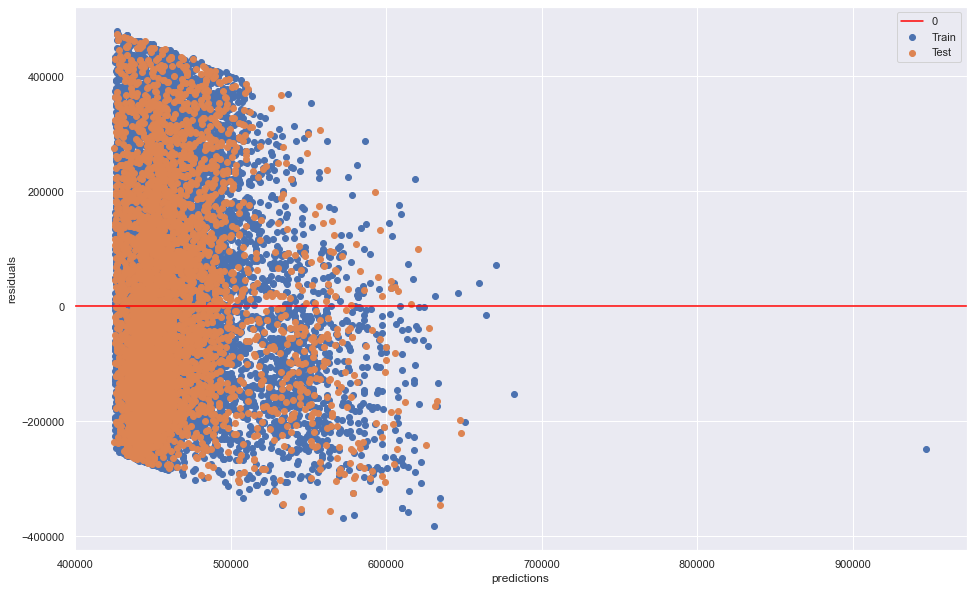

(10241    465767.842810
 2558     450496.455795
 5470     434620.786425
 4048     448519.742738
 6460     437689.059679
              ...      
 12623    428713.180428
 13372    437462.677027
 6052     456371.785234
 960      440539.416775
 17731    452420.122915
 Length: 14403, dtype: float64,
 3627     437336.402427
 10574    436642.177084
 16490    452557.936022
 4889     436315.395335
 1684     450598.359235
              ...      
 7316     443670.851559
 9584     437339.929849
 13320    514713.692626
 11078    459316.265391
 18803    447377.453364
 Length: 4802, dtype: float64)

In [118]:
evaluate_model(X_train, X_test, y_train, y_test)

In [87]:
#Second model
X = df_new['bathrooms']
Y = df_new['price']

In [88]:
model2 = sm.OLS(Y, sm.add_constant(X))
results2 = model2.fit()
results2.params

const        252541.974604
bathrooms    102156.873506
dtype: float64

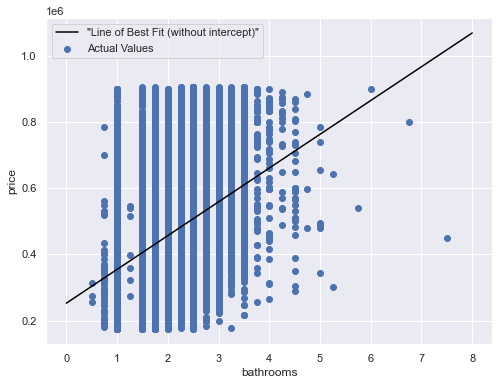

In [89]:
plt.figure(figsize=(8,6))

# this plots the actual data
plt.scatter(X, Y, label='Actual Values')

# this plots our line of best fit between 40 and 100
x_pred_range = np.linspace(0, 8, 80)
plt.plot(x_pred_range, results2.predict(sm.add_constant(x_pred_range)), 
         label='"Line of Best Fit (without intercept)"', color='black')

plt.ylabel('price')
plt.xlabel('bathrooms')
plt.legend()
plt.show()

In [90]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     3529.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:35:45   Log-Likelihood:            -2.5777e+05
No. Observations:               19205   AIC:                         5.155e+05
Df Residuals:                   19203   BIC:                         5.156e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.525e+05   3695.704     68.334      0.000    2.45e+05     2.6e+05
bathrooms   1.022e+05   1719.542     59.409      0.000    9.88e+04    1.06e+05
==============================================================================
Omnibus:                      933.074   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              945.822
Skew:                           0.506   Prob(JB):                    4.14e-206
Kurtosis:                       2.602   Cond. No.                         8.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#Train for second model
X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size=0.25, random_state=42)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2648.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:11:59   Log-Likelihood:            -1.9332e+05
No. Observations:               14403   AIC:                         3.866e+05
Df Residuals:                   14401   BIC:                         3.867e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.538e+05   4257.500     59.612      0.0

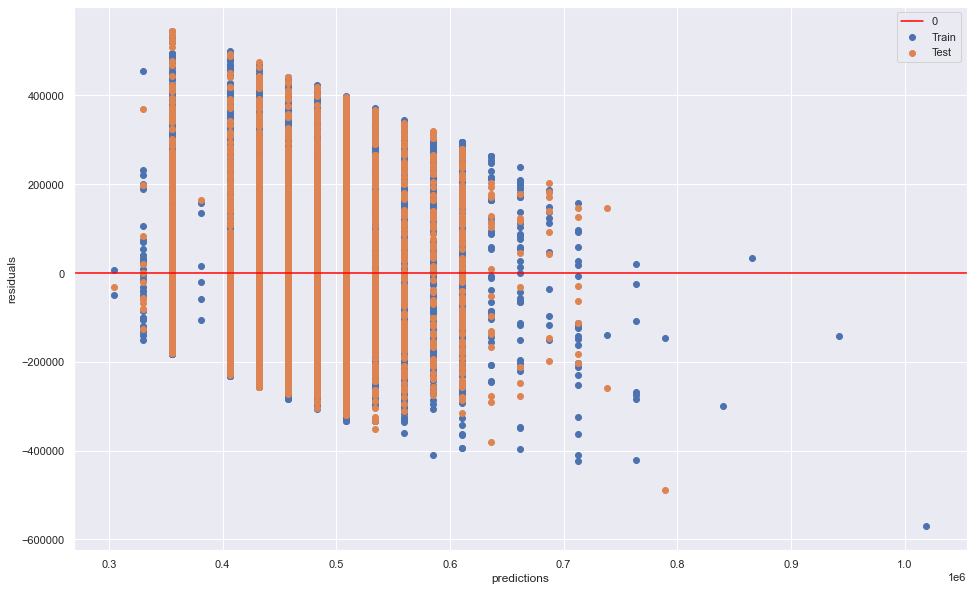

(10241    559818.639075
 2558     559818.639075
 5470     457812.281084
 4048     457812.281084
 6460     355805.923092
              ...      
 12623    457812.281084
 13372    483313.870581
 6052     406809.102088
 960      457812.281084
 17731    483313.870581
 Length: 14403, dtype: float64,
 3627     432310.691586
 10574    432310.691586
 16490    432310.691586
 4889     406809.102088
 1684     483313.870581
              ...      
 7316     355805.923092
 9584     355805.923092
 13320    483313.870581
 11078    508815.460079
 18803    559818.639075
 Length: 4802, dtype: float64)

In [28]:
evaluate_model(X_train, X_test, y_train, y_test)

## 3d Model

Ok, we have now made two baseline models. Our next model will have multiple variables with price, sqft_living, and # of bathrooms

In [29]:
# OK so our rvalues suck lmao. Lets compare bathrooms, price, and sqft at same time
#This violate multicollinearity assumption
sample = df_new.sample(1000)

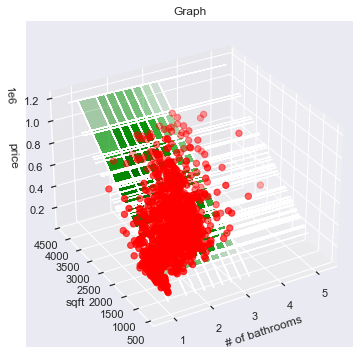

In [30]:
ax = plt.figure(figsize=(8, 6)).add_subplot(111, projection='3d')
ax.scatter(sample['bathrooms'], sample['sqft_living'], sample['price'],
           depthshade=True, s=40, color='#ff0000')
# create x,y
xx, yy = np.meshgrid(sample['bathrooms'], sample['sqft_living'])

# multiple linear regression model with both inputs
results = sm.OLS(df['price'], sm.add_constant(df[['bathrooms', 'sqft_living']])).fit()
# calculate corresponding z using parameters from the above model
z = results.params['bathrooms'] * xx + results.params['sqft_living'] * yy + results.params['const']

# plot the surface
ax.plot_surface(xx, yy, z, alpha=0.01, color='#00ff00')

ax.view_init(30, azim=240)
ax.set_xlabel('# of bathrooms')
ax.set_ylabel('sqft')
ax.set_zlabel('price')
plt.title('Graph');

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.049e+04
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:12:03   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.002e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.992e+04   5237.187     -7.622      0.000   -5.02e+04   -2.97e+04
bathrooms   -5095.2734   3535.830     -1.441      0.150    -1.2e+04    1835.215
sqft_living   284.0883      2.962     95.926      0.000     278.284     289.893
==============================================================================
Omnibus:                    14783.268   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           540478.758
Skew:                           2.815   Prob(JB):                         0.00
Kurtosis:                      26.852   Cond. No.                     7.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#Train for 3d model
X = df_new[['sqft_living', 'bathrooms']]
y = df_new['price']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)

In [34]:
model_train_3d = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [35]:
model_train_3d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     3268.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:12:06   Log-Likelihood:            -1.9184e+05
No. Observations:               14403   AIC:                         3.837e+05
Df Residuals:                   14400   BIC:                         3.837e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.932e+05   3984.817     48.482      0.000    1.85e+05    2.01e+05
sqft_living   136.0506      2.374     57.313      0.000     131.398     140.704
bathrooms    1916.4262   2499.918      0.767      0.443   -2983.735    6816.587
==============================================================================
Omnibus:                      466.056   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              467.591
Skew:                           0.410   Prob(JB):                    2.91e-102
Kurtosis:                       2.673   Cond. No.                     7.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
#Sidenote: COOL MODEL ALERT!
import plotly.graph_objects as go

In [37]:
import plotly.express as px

fig = px.scatter_3d(df, x='sqft_living', y='bathrooms', z='price')
fig.show()

## Models

In [38]:
# Next step is to create some more models 
df_new.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'price_z'],
      dtype='object')

In [123]:
#Let's compare different types of sqft living. Is it better to expand the house to take up more of the lot? 
X = df_new['sqft_living'] / df_new['sqft_lot']
Y = df_new['price']

In [166]:
def preprocess(X, Y, cat_cols = []):
    """
    This function defines our train-test split and also scales it. Furthermore, if cat_cols has a length greater than one,
    we will one hot encode cat_cols. We use this for when our models utilize the column 'zipcode'. By calling this function
    throughout the notebook, we will be able to have more legible code."""
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.25, random_state=42)
    
    if len(cat_cols) > 0:
        # Encode create an encoder object. This will help us to convert
        # categorical variables to new columns
        encoder = OneHotEncoder(handle_unknown='error',
                                drop='first')

        # Create an columntransformer object.
        # This will help us to merge transformed columns
        # with the rest of the dataset.
        ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                               remainder='passthrough', sparse_threshold=0)
        ct.fit(X_train)
        X_train = ct.transform(X_train)
        X_test = ct.transform(X_test)

    
    # Scale
        # scale our data - now let's use a Min Max Scaler because binaries!
    scaler = MinMaxScaler()

    # train on train data
    scaler.fit(X_train)

    # transform both train and test data
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

In [130]:
X_train_scaled, X_test_scaled, y_train, y_test = preprocess(X.values.reshape(-1, 1), Y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     431.8
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           1.59e-94
Time:                        11:23:05   Log-Likelihood:            -1.9432e+05
No. Observations:               14403   AIC:                         3.887e+05
Df Residuals:                   14401   BIC:                         3.887e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.254e+05   2263.757    187.929      0.0

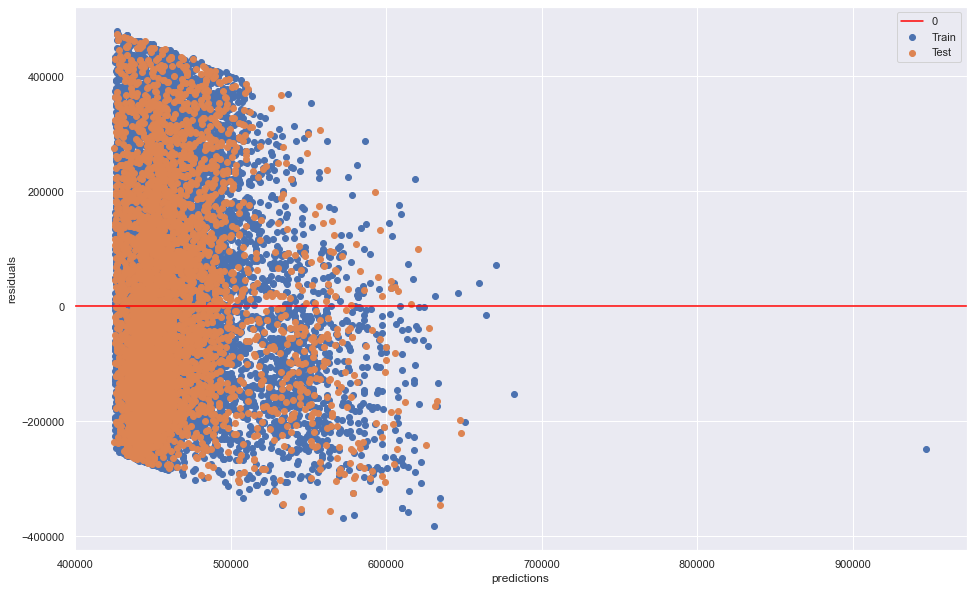

(array([465767.84281022, 450496.45579456, 434620.78642472, ...,
        456371.78523434, 440539.41677467, 452420.12291509]),
 array([437336.40242697, 436642.17708395, 452557.93602165, ...,
        514713.69262584, 459316.26539092, 447377.45336449]))

In [131]:
evaluate_model( X_train_scaled, X_test_scaled, y_train, y_test)

In [132]:
#Running model on condition, grade, sqft living, and bathrooms
X = df_new[['condition', 'grade', 'sqft_living', 'bathrooms']]
Y = df_new['price']

In [133]:
X_train_scaled, X_test_scaled, y_train, y_test = preprocess(X, Y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     2429.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:24:39   Log-Likelihood:            -1.9082e+05
No. Observations:               14403   AIC:                         3.817e+05
Df Residuals:                   14398   BIC:                         3.817e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.366e+04   6834.662      1.999      0.0

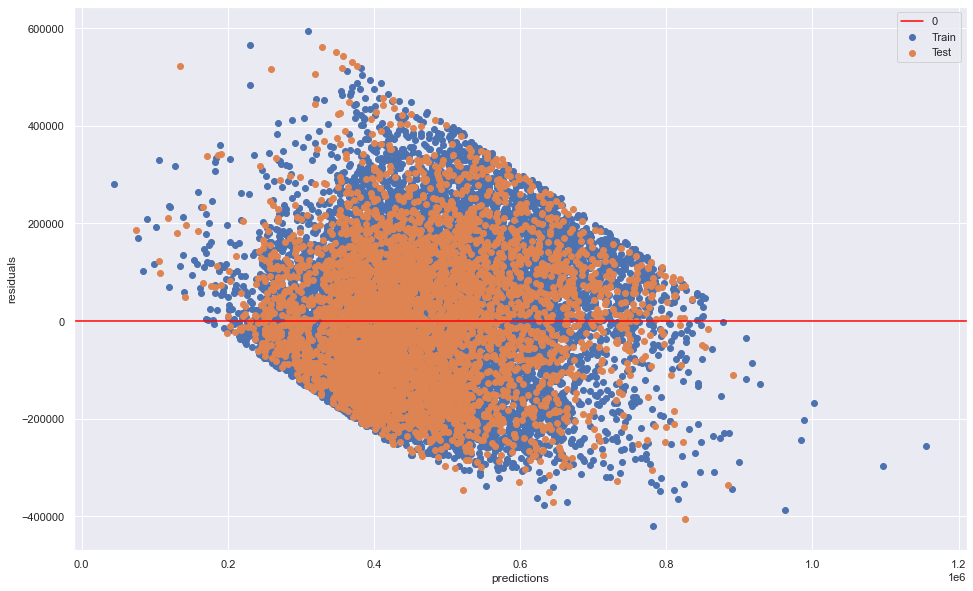

(array([526665.33435477, 578628.49496876, 313755.9459607 , ...,
        482038.63002091, 333612.2516361 , 393717.16493936]),
 array([569275.23939616, 438008.207651  , 419906.9246528 , ...,
        433806.98760988, 575682.06463719, 585317.26091756]))

In [134]:
evaluate_model( X_train_scaled, X_test_scaled, y_train, y_test)

In [49]:
#bedrooms ratio bathrooms grade condition sqft living zipcode w/ price
#sqft lot 15, sqft living, bedrooms/ bathroom, floors, grad, condition, zipcode, sqft basement

In [157]:
df_new['bbratio'] = df['bathrooms'] / df['bedrooms']

In [158]:
X = df_new[['bbratio', 'grade', 'condition', 'sqft_living', 'zipcode']]
Y = df_new['price']

In [159]:
cat_cols = ['zipcode']

In [160]:
X_train_scaled, X_test_scaled, y_train, y_test = preprocess(X, Y, cat_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     713.4
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:32:46   Log-Likelihood:            -1.8349e+05
No. Observations:               14403   AIC:                         3.671e+05
Df Residuals:                   14329   BIC:                         3.677e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.617e+04   6807.791    -11.188      0.0

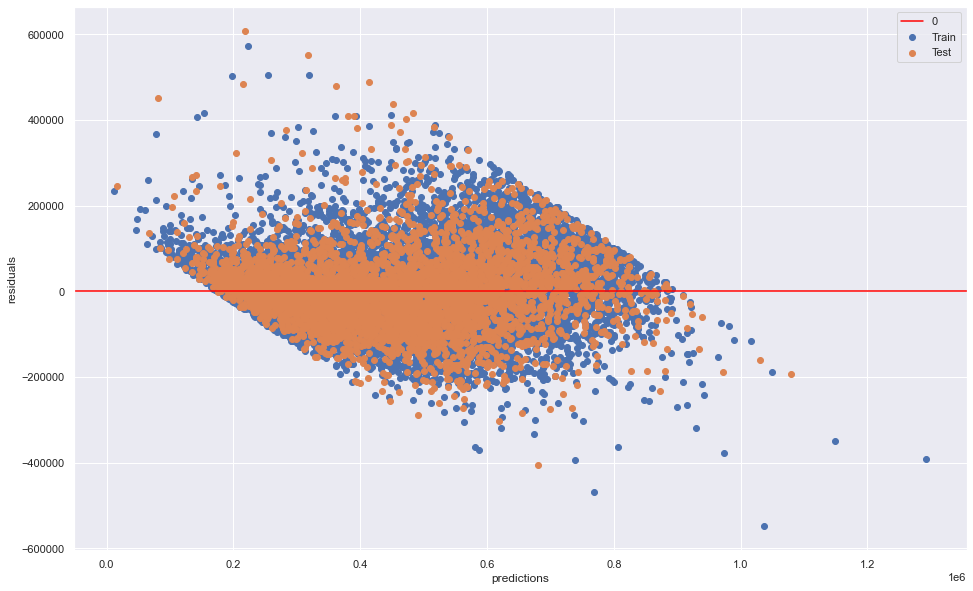

(array([446511.45386425, 572655.55145349, 236328.81286373, ...,
        562118.18699137, 393187.4317373 , 292078.53159193]),
 array([528968.24898453, 469262.15836197, 272720.95228118, ...,
        430722.0659344 , 544167.52721872, 547274.9101853 ]))

In [161]:
evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test)

In [162]:
#All Variable model excluding lat and long in bryan notebook
X = df_new[['bbratio', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode',
       'sqft_living15', 'sqft_lot15']]
Y = df_new['price']

In [163]:
cat_cols = ['zipcode']

In [164]:
X_train_scaled, X_test_scaled, y_train, y_test = preprocess(X, Y, cat_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     747.8
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:32:52   Log-Likelihood:            -1.8284e+05
No. Observations:               14403   AIC:                         3.658e+05
Df Residuals:                   14324   BIC:                         3.664e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.131e+05   6604.800    -17.118      0.0

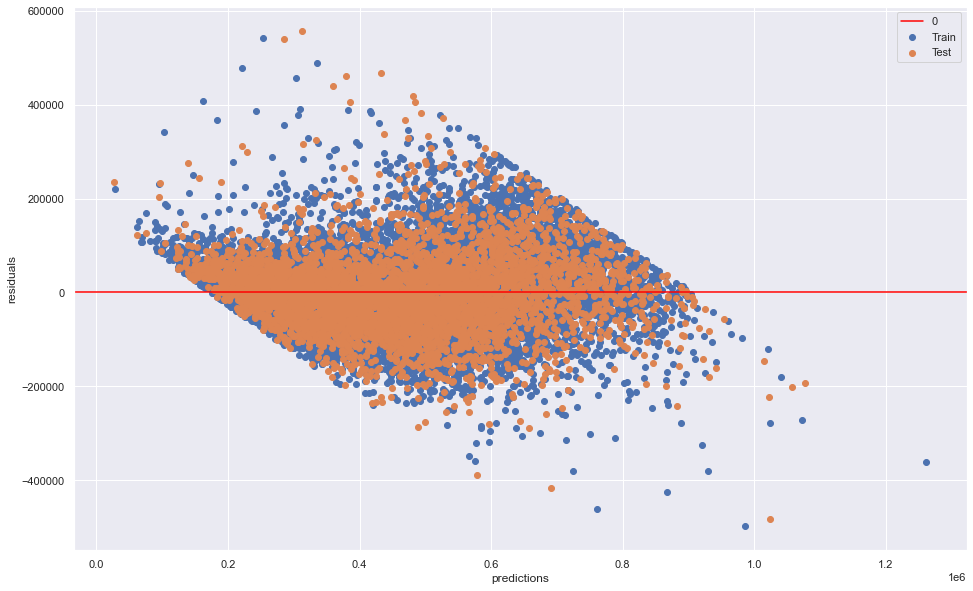

(array([455122.7399267 , 597626.14529496, 254318.80309668, ...,
        567088.51891894, 391386.05375131, 263463.81147277]),
 array([558850.05075318, 460635.58048028, 252593.69063591, ...,
        394228.46529275, 555664.92273069, 557206.64990151]))

In [165]:
evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test)